<h3>Описание данных</h3><br><br>
<b>Name</b> — название игры<br>
<b>Platform</b> — платформа<br>
<b>Year_of_Release</b> — год выпуска<br>
<b>Genre</b> — жанр игры<br>
<b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)<br>
<b>EU_sales</b> — продажи в Европе (миллионы долларов)<br>
<b>JP_sales</b> — продажи в Японии (миллионы долларов)<br>
<b>Other_sales</b> — продажи в других странах (миллионы долларов)<br>
<b>Critic_Score</b> — оценка критиков (максимум 100)<br>
<b>User_Score</b> — оценка пользователей (максимум 10)<br>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>

## Шаг 1: Изучим общую информацию из имеющихся данных 

In [2]:
#Подключим необходимые библиотеки для проведения анализа
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
# Назначим к переменной df наш датасет games.csv
dataset_filepath = "C:\\Users\\Администратор\\Downloads\\games.csv" # Путь к файлу с данными
df = pd.read_csv(dataset_filepath)
sns.set_style("darkgrid")

In [4]:
#Выведем полностью наш датасет
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Посмотрим информацию о нашей таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Посмотрим какие столбцы у нас имеются и все ли с ними впорядке
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#Посчитаем количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
#Посмотрим на таблицу, где имеются пустые значения в столбце critic_score
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#Посмотрим на таблицу, где имеются пустые значения в столбце user_score
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Посмотрим на таблицу, где имеются пустые значения в столбце rating
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#Посмотрим на таблицу, где имеются пустые значения в столбце year_of_release
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#Посмотрим какие платформы для игры у нас имеются
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [13]:
#Посмотрим какие жанры игр мы имеем и нет ли повторений
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [14]:
#Посчитаем количество дубликатов
df.duplicated().sum()

0

## Шаг 2. Подготовим данные

#### Заменим названия столбцов (приведем к нижнему регистру);

In [15]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# Приведем к нижнему регистру следующие столбцы:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

#### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [17]:
# Изменим тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [18]:
#Посмотрим как выглядит теперь наша таблица
df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
766,skylanders swap force,wii,2013,platform,1.21,0.75,0.00,0.19,NaN,6.6,e10+
10206,tonic trouble,n64,1999,platform,0.09,0.02,0.00,0.00,NaN,NaN,NaN
5558,championship bass,ps,1999,sports,0.18,0.12,0.00,0.02,NaN,NaN,NaN
5103,quake 4,x360,2005,shooter,0.32,0.02,0.00,0.03,75.0,6.7,m
10638,virtual pool 64,n64,1998,sports,0.08,0.02,0.00,0.00,NaN,NaN,NaN
5093,high heat major league baseball 2003,ps2,2002,sports,0.18,0.14,0.00,0.05,84.0,7.9,e
11065,rugby 15,ps3,2015,sports,0.03,0.05,0.00,0.01,NaN,tbd,e
5465,beatmania append gottamix,ps,1999,simulation,0.00,0.00,0.31,0.02,NaN,NaN,NaN
14774,the settlers ii 10th anniversary,pc,2006,action,0.00,0.02,0.00,0.00,NaN,NaN,NaN
6608,happy feet,gc,2006,action,0.20,0.05,0.00,0.01,NaN,8.6,e


#### Обработаем пропуски при необходимости:

In [19]:
# Посчитаем количество пустых значений в столбце year_of_release
df['year_of_release'].isna().sum()

269

In [20]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой но в графе year_of_release пусто
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [21]:
#Посмотрим сколько удалось заполнить пустых значений
df['year_of_release'].isna().sum()

146

#### Обратим внимание на аббревиатуру tbd в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать

Аббревиатура tbd значит <b>to be determined, to be done.</b> То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на Nan

In [22]:
#Заменим tbd на Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [23]:
# Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [25]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Шаг 3. Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

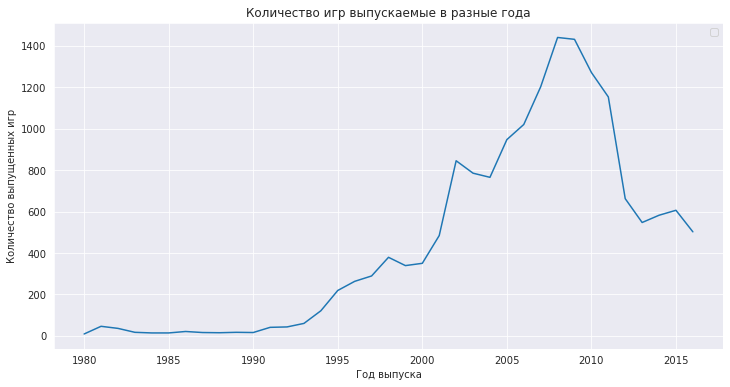

In [26]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Вывод:

    - Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
    - С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

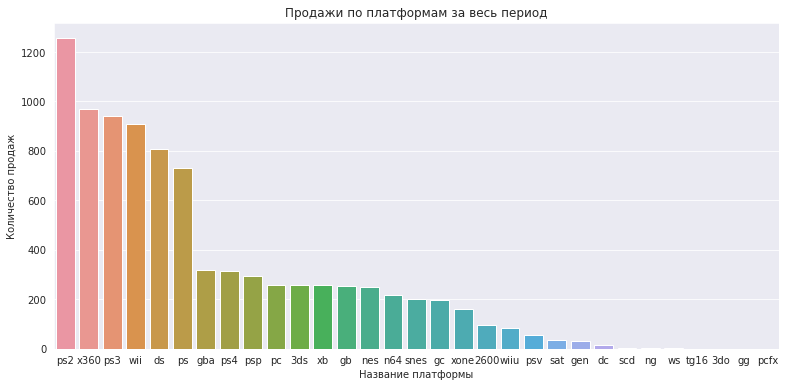

In [27]:
platform_on_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS<br><br>

In [28]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [29]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [30]:
#Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


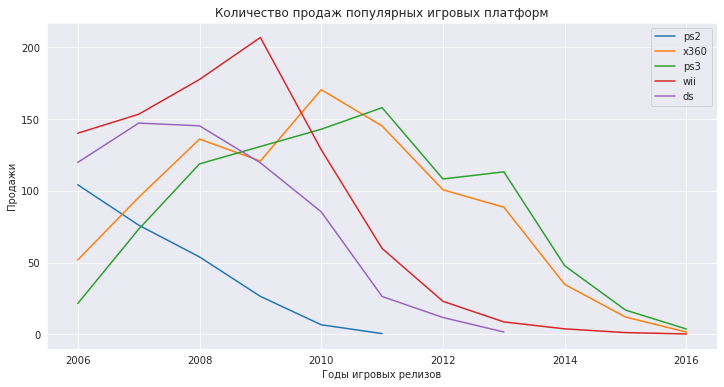

In [31]:
#Отрисуем все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

Вывод:
    
    - Практически все игровые платформы в среднем существуют по 10 лет. 
    - Cамые продаваемые это Sony Play Station и XBOX 
    - Самый пик наступает примерно через 5 лет после выхода приставки
    - у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [32]:
#Сохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = ['ps2','x360','ps3','wii','ds']
df_top_5_platforms = df[df['platform'].isin(['ps2','x360','ps3','wii','ds'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]

In [33]:
df_top_5_platforms['total_sales'].describe()

count    7469.000000
mean        0.280778
std         0.300902
min         0.000000
25%         0.060000
50%         0.160000
75%         0.400000
max         1.390000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

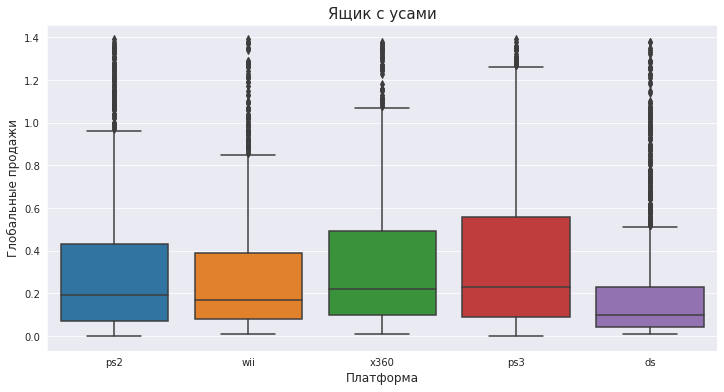

In [34]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Вывод: <br>
    - Провели срез данных для того, чтоыб отрисовать ящики с усами. 
    - Исходя из графиков видно, что медиана протекает у всех по разному
    - Больше всех продаж у PS3, затем X360, после PS2, WII и DS на последнем месте. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [35]:
#Корреляция между оценками пользователей и продажами 
sony_play_station2 = df[df['platform']=='ps2']
sony_play_station2['user_score'].corr(sony_play_station2['total_sales'])

0.17286551112058182

Text(0.5, 1.0, 'test')

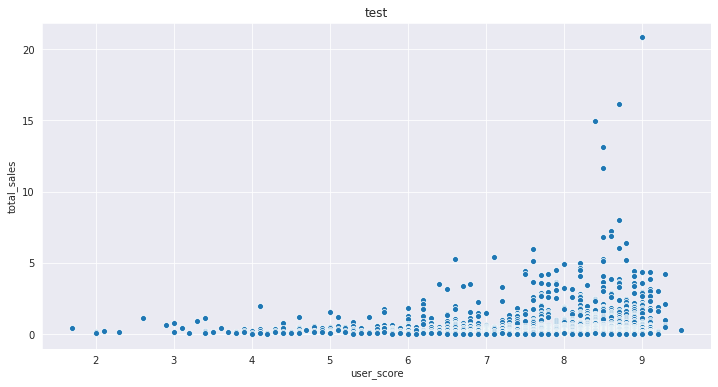

In [36]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station2)
plt.title('test')

Text(0.5, 1.0, 'test')

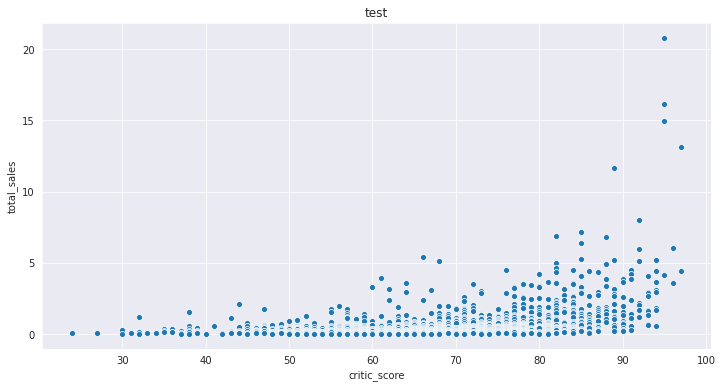

In [37]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station2)
plt.title('test')

In [38]:
#Корреляция между оценкой критиков и продажам
sony_play_station2['critic_score'].corr(sony_play_station2['total_sales'])

0.3954345494545488

#### Соотнесем выводы с продажами игр на других платформах.

In [39]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

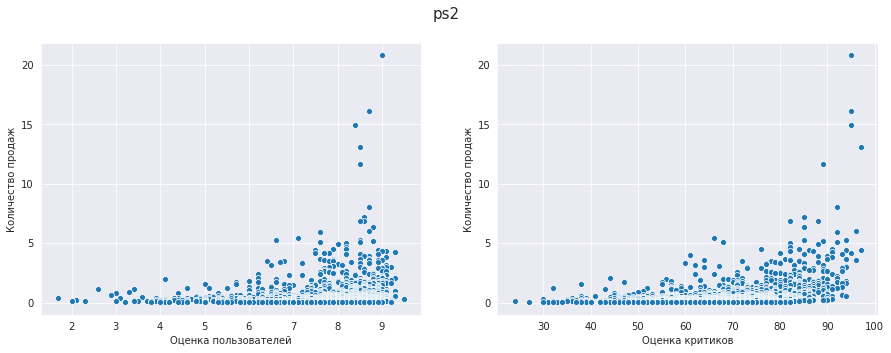

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.3954345494545488
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058182




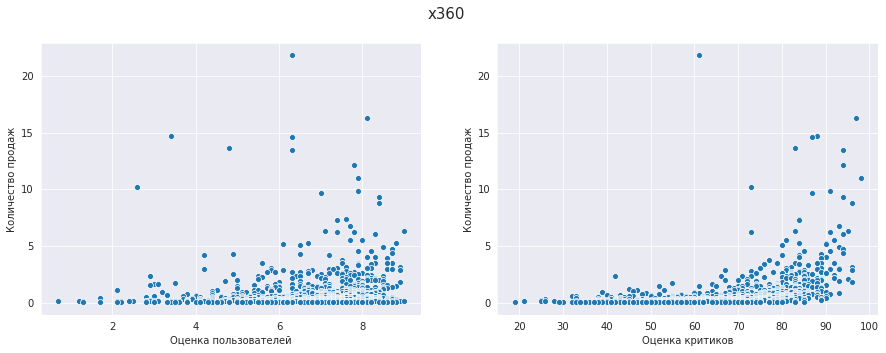

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.39373586530725874
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.1144588297845418




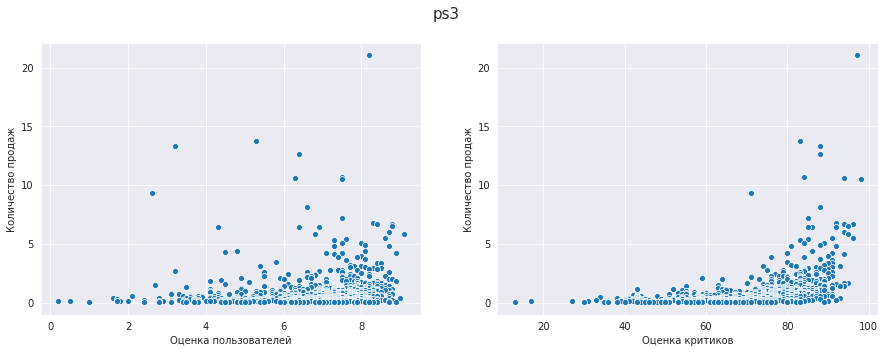

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.43243156856420617
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341706




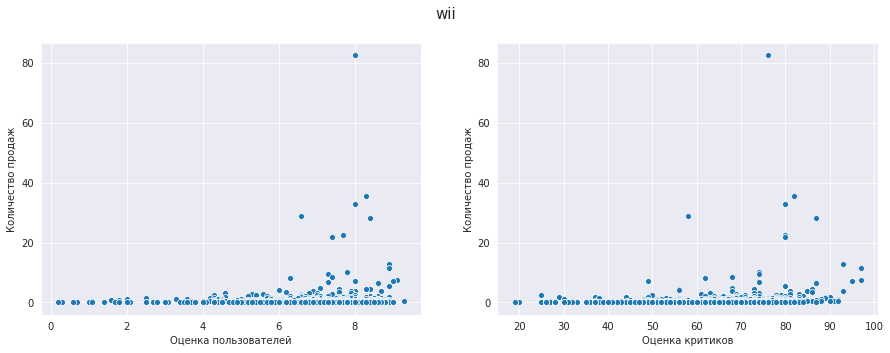

Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.1775598880608996
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11241436067003167




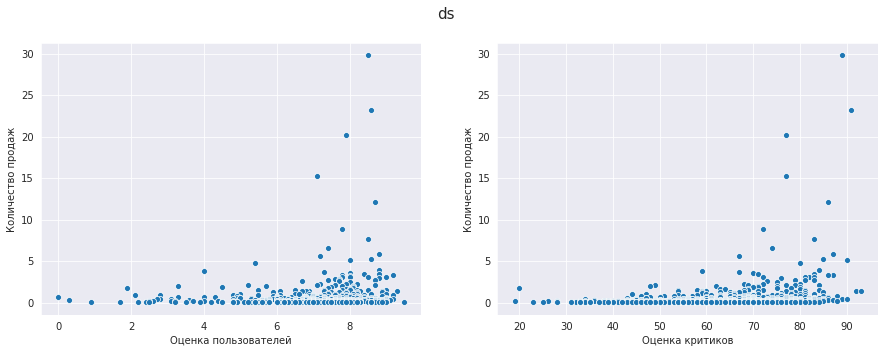

Корреляция между отзывами критиков и игровой платформой  DS : Слабая 0.23637945738859714
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.13043550111642488




In [40]:
#С помощью цикла выведем все 5 графиков
for platform in list_of_top5:
    other_platform_matrix(platform)

In [41]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS2 : 1.7128899713716355
Стандартное отклонение PS2 : 1.3087742247506386
Среднее PS2 : 7.626833199033038
Медиана PS2 : 8.0


Дисперсия X360 : 2.07528808687937
Стандартное отклонение X360 : 1.44058602203387
Среднее X360 : 6.683540372670819
Медиана X360 : 7.0


Дисперсия PS3 : 2.1327377071986597
Стандартное отклонение PS3 : 1.4603895737777162
Среднее PS3 : 6.726567844925886
Медиана PS3 : 7.1


Дисперсия WII : 3.0197678252551015
Стандартное отклонение WII : 1.7377479176379702
Среднее WII : 6.74267857142857
Медиана WII : 7.15


Дисперсия DS : 2.2704505438375113
Стандартное отклонение DS : 1.5068014281376
Среднее DS : 7.025193798449613
Медиана DS : 7.4




In [42]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS2 : 170.82854741560416
Стандартное отклонение PS2 : 13.070139533134455
Среднее PS2 : 68.72727272727273
Медиана PS2 : 70.0


Дисперсия X360 : 225.2516387464008
Стандартное отклонение X360 : 15.008385614262474
Среднее X360 : 68.61681222707423
Медиана X360 : 71.0


Дисперсия PS3 : 196.96800118976802
Стандартное отклонение PS3 : 14.034528890909307
Среднее PS3 : 70.3829268292683
Медиана PS3 : 73.0


Дисперсия WII : 220.95190590985473
Стандартное отклонение WII : 14.864451080004763
Среднее WII : 62.82393162393162
Медиана WII : 65.0


Дисперсия DS : 184.03656565302913
Стандартное отклонение DS : 13.566007727147626
Среднее DS : 63.76150627615063
Медиана DS : 66.0




 - Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам. 
 - Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [43]:
# Методом сводных таблиц выведем жанры и их продажи.  отсортируем по убыванию. 
distr_genre = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Text(0, 0.5, 'Продажи')

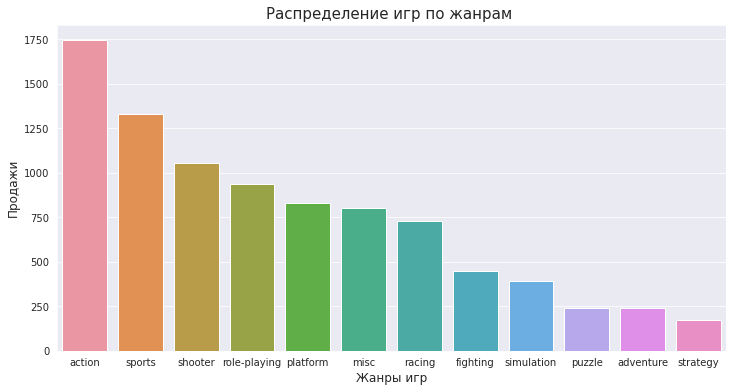

In [44]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

 - Лучше всего продаются жанры Экшн. Стратегии как ни странно держутся на последнем месте. 


## Шаг 4. Составим портрет пользователя каждого региона

In [45]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_2016(row, title):
    temp = df[df['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        



### Портрет пользователя North America 

  platform  na_sales
0     x360    602.47
1      ps2    583.84
2      wii    496.90
3      ps3    393.49
4       ds    382.40



      genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27



  rating  na_sales
0      e   1292.99
1      t    759.75
2      m    748.48
3   e10+    353.32
4    k-a      2.56





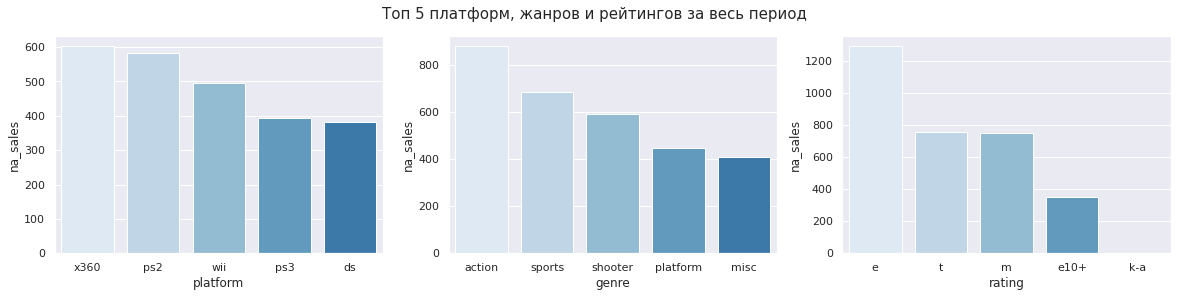

In [46]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



  rating  na_sales
0      m     15.67
1      t      8.95
2      e      7.97
3   e10+      3.81





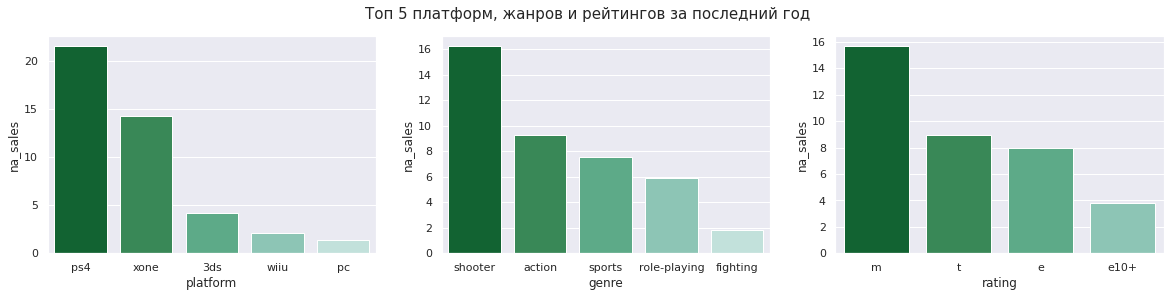

In [47]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

Вывод:
- Самые популярные игровые платформы в северной америке за все время это: XBOX, PS2, WII, PS3, DS
- Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
<br><br>
- Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3
- Топ жанров игр: Shooter, Action, Sports
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

### Портрет пользователя European Union

  platform  eu_sales
0      ps2    339.29
1      ps3    330.29
2     x360    270.76
3      wii    262.21
4       ps    213.61



     genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74



  rating  eu_sales
0      e    710.25
1      m    483.97
2      t    427.03
3   e10+    188.52
4     ao      0.61





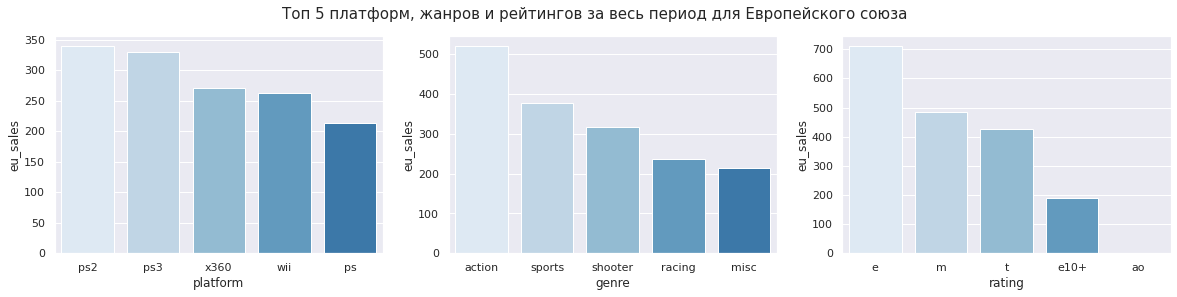

In [48]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



  rating  eu_sales
0      m     16.54
1      e     13.61
2      t      9.79
3   e10+      3.81





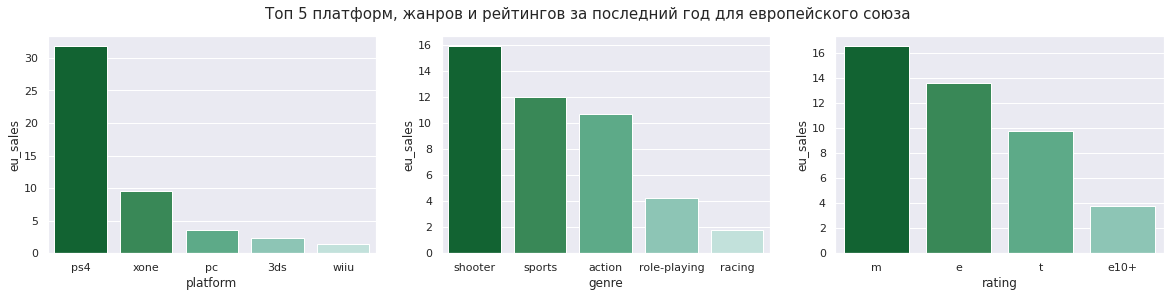

In [49]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для европейского союза
for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

Вывод:
- Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"
<br><br>
- За последний год интерес у пользователя кардинально изменился:
- Топ жанров стал: shooter, sports, action
- Топ платформ: PS4, Xone, PC
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

#### Портрет пользователя Japanese 

  platform  jp_sales
0       ds    175.57
1       ps    139.82
2      ps2    139.20
3     snes    116.55
4      3ds    100.67



          genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11



  rating  jp_sales
0      e    198.11
1      t    151.40
2      m     64.24
3   e10+     40.20
4    k-a      1.46





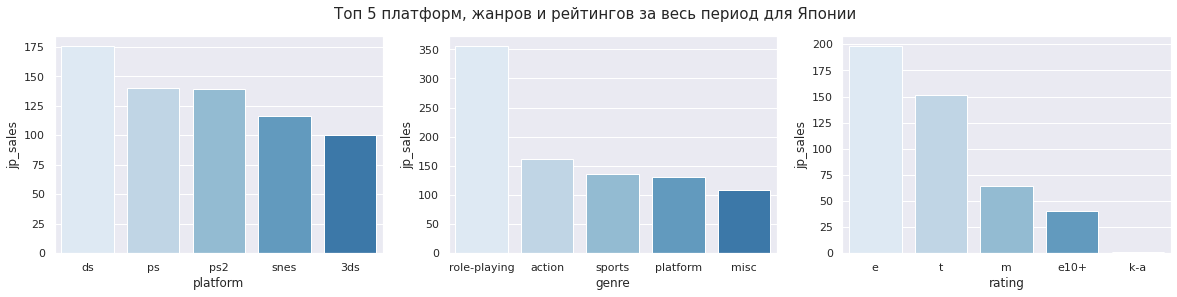

In [50]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



  rating  jp_sales
0      t      2.27
1      m      1.20
2      e      1.07
3   e10+      0.45





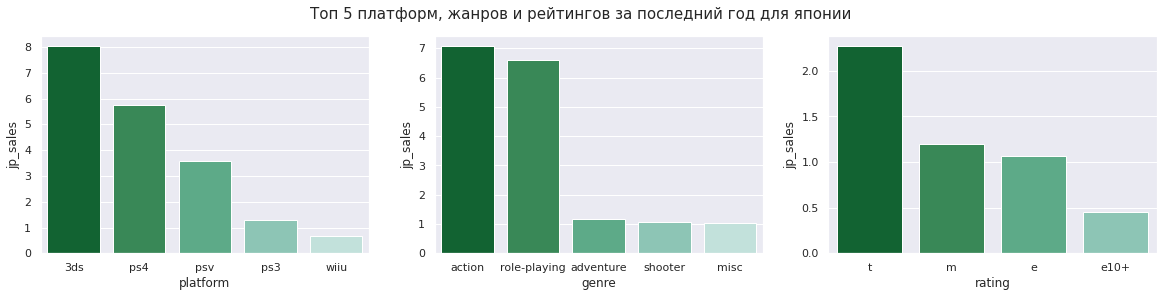

In [51]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для японии
for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

Вывод:
- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
<br><br>
- За последний год интерес у пользователя кардинально изменился
- Топ Жанров: action, role-playing, adventure
- топ платформ: 3ds, ps4, psv
- топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

<h3>Вывод по составлению портрета пользователя каждого региона</h3><br>
Самые популярные игровые платформы в северной америке это: XBOX, PS2, WII, PS3, DS
Топ 5 жанров в северной америке : action, sports, shooter, platform, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
<br><br>
Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS
Топ 5 жанров в Европе : action, sports, shooter, racing, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"
<br><br>
Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше" <br><br>
    
<b>Если брать данные за последний год</b>:<br>
То в Северной Америке:<br>
    <li>топ игровых платформ выглядит так: PS4, Xone, DS3</li>
    <li>Топ Жанров игр: Shooter, Action, Sports</li>
    <li>Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"</li><br>
<br>
В Европейском союзе:<br>
    <li>Топ игровых платформ : PS4, Xone, PC</li>
    <li>Топ жанров: Shooter, Sports, Action</li>
    <li>Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"</li>
<br><br>
В Японии:<br>
    <li>Топ игровых платформ : 3DS, PS4, PSV</li>
    <li>Топ жанров: Action, Role-playing, Adventure</li>
    <li>Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"</li>  
<br><br>
Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

## Шаг 6. Общий вывод

<h3>Общий вывод</h3><br>
    <li>Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы. </li>
    <li>Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа</li>
    <li>Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр</li>
    <li>За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS</li>
    <li>Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли</li>
    <li>Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус</li>
    <li>Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.</li>
    <li>Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии</li><br>
    <li><b>После мы составили портреты пользователей каждого региона.</b></li>
    <ol>
        <li>Выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше". </li>
        <li>В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.</li>
        <li>В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.</li>
    </ol>
    <br>
    <li>Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4</li>
    <li>Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры. </li>